Part one of the problem 1 
Generating 
Part one of the problem 1 
Randomly generated values of L[0] =  -10  U[0] =  4
Number of iterations for Interval Bisection Search to reach tolerance 0.01 is  11
Number of iterations for Golden Section Search to reach tolerance 0.01 is  16
Hence IBS reach the tolerance condition with fewer iterations, on average


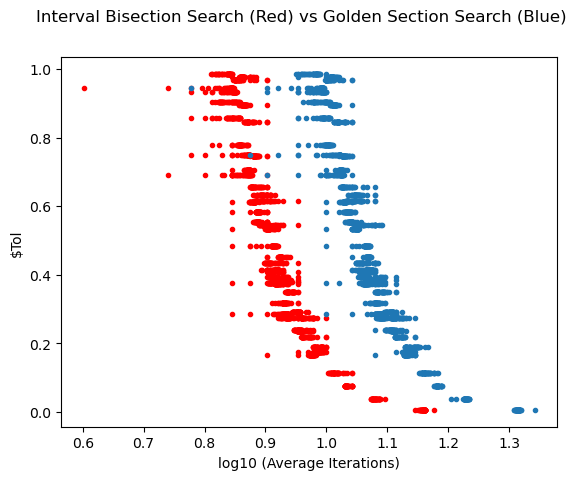

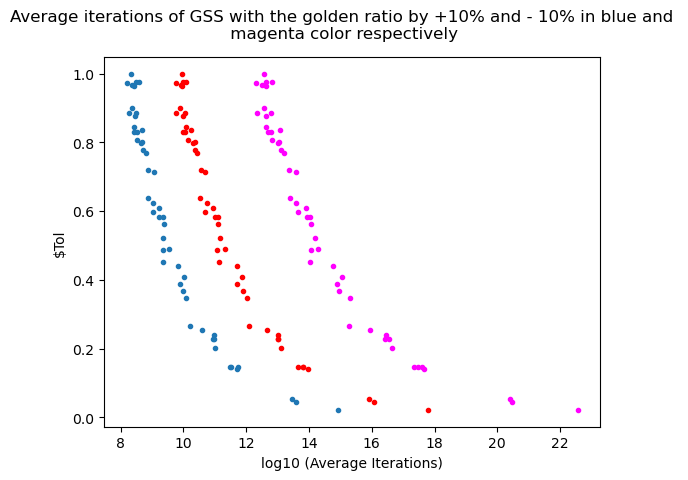

In [1]:
import matplotlib.pyplot as plt
import math
import random

gr = (math.sqrt(5) + 1) / 2

def IBS(L,U,tol):
    f=lambda x: 2*x 
    ibs=[] 
    iterations=0 
    a=L
    b=U
    while (b-a) > tol and iterations<1000: 
        if f((a+b)/2) > 0:
            a=a
            b=(a+b)/2 
        else:
            a=(a+b)/2
            b=b
        iterations+=1
    ibs.append(iterations) 
    ibs.append((a+b)/2) 
    return ibs

def GSS(L,U,tol):
    a=L
    b=U
    f=lambda x: x*x
    iterations=0
    gss=[]
    c=b-(b-a)/gr 
    d=a+(b-a)/gr
    while (b - a) > tol and iterations<1000:
        if f(c) < f(d): 
            b=d
        else:
            a=c
        iterations+=1
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    gss.append(iterations)
    gss.append((a+b)/2)
    return gss

print("Part one of the problem 1 \nGenerating ")
L=random.randint(-10, 0)
U=random.randint(0, 10)
print("Part one of the problem 1 \nRandomly generated values of L[0] = ",L ," U[0] = ",U)
print("Number of iterations for Interval Bisection Search to reach tolerance 0.01 is ",IBS(L,U,0.01)[0])
print("Number of iterations for Golden Section Search to reach tolerance 0.01 is ",GSS(L,U,0.01)[0])
print("Hence IBS reach the tolerance condition with fewer iterations, on average")

def Modified_GSS_plus10(L,U,tol):
    a=L
    b=U
    newgr=gr*(1.1)
    f=lambda x: x*x 
    iterations=0
    gss=[] 
    c=b-(b-a)/newgr 
    d=a+(b-a)/newgr
    while(b-a)>tol and iterations<1000:
        if f(c) < f(d): 
            b=d
        else: 
            a=c
        iterations+=1
        c=b-(b-a)/ newgr
        d=a+(b-a)/ newgr 
    gss.append(iterations)
    gss.append((a+b)/2)
    return gss 

def Modified_GSS_min10(L,U,tol): 
    a=L
    b=U
    newgr=gr*(0.9) 
    f=lambda x: x*x 
    iterations=0
    gss=[]
    c=b-(b-a)/newgr
    d = a + (b - a) / newgr
    while (b - a) > tol and iterations<1000:
        if f(c) < f(d): 
            b=d
        else: 
            a=c
        iterations+=1
        c = b - (b - a) / newgr 
        d = a + (b - a) / newgr
    gss.append(iterations)
    gss.append((a+b)/2)
    return gss

def graph():
    x_ibs=[]
    x_gss=[]
    y_ibs=[]
    y_gss=[]
    i=0.0000001
    for k in range(1,51):
        i= random.uniform(0.00000001, 1)
        t_avg_ibs=[]
        t_avg_gss=[]
        for j in range(1,51):
            L=random.randint(-100, 0)
            U=random.randint(0, 100)
            z=IBS(L,U,i)
            t_avg_ibs.append(z[0])
            t_avg_gss.append(GSS(L,U,i)[0])
            x_ibs.append(math. log10(sum(t_avg_ibs)/len(t_avg_ibs)))
            y_ibs.append(i)
            x_gss.append(math.log10(sum(t_avg_gss)/len(t_avg_gss)))
            y_gss.append(i)
    plt.plot(x_ibs, y_ibs, 'r.')
    plt.plot(x_gss, y_gss, '.')
    plt.xlabel('log10 (Average Iterations)')
    plt.ylabel('$Tol')
    plt.suptitle('Interval Bisection Search (Red) vs Golden Section Search (Blue)')
    plt.show()
    x_gssplus10=[]
    x_gssmin10=[]
    x_gss=[]
    y_gssplus10=[]
    y_gssmin10=[]
    y_gss=[]
    i=0.0000001
    for k in range(1,51):
        i= random.uniform(0.00000001, 1)
        t_avg_gssplus10=[]
        t_avg_gssmin10=[]
        t_avg_gss=[]
        for j in range(1,51):
            L=random.randint(-100, 0)
            U=random.randint(0, 100)
            t_avg_gssplus10.append(Modified_GSS_plus10(L,U,i)[0])
            t_avg_gssmin10.append(Modified_GSS_min10(L,U,i)[0])
            t_avg_gss.append(GSS(L,U,i)[0])
        x_gssplus10.append(sum(t_avg_gssplus10)/len(t_avg_gssplus10))
        y_gssplus10.append(i)
        x_gssmin10.append(sum(t_avg_gssmin10)/len(t_avg_gssmin10))
        y_gssmin10.append(i)
        x_gss.append(sum(t_avg_gss)/len(t_avg_gss))
        y_gss.append(i)
    plt.suptitle('Average iterations of GSS with the golden ratio by +10% and - 10% in blue and \n magenta color respectively ')
    plt.plot(x_gssplus10, y_gssplus10, '.')
    plt.plot(x_gssmin10, y_gssmin10, '.', color='magenta')
    plt.plot(x_gss, y_gss, 'r.')
    plt.xlabel('log10 (Average Iterations)')
    plt.ylabel('$Tol')
    plt.show()
    return

graph()